# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [13]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

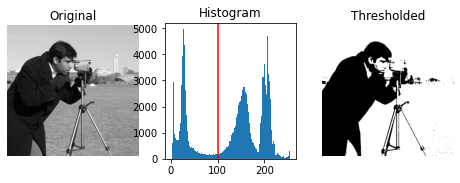

In [14]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




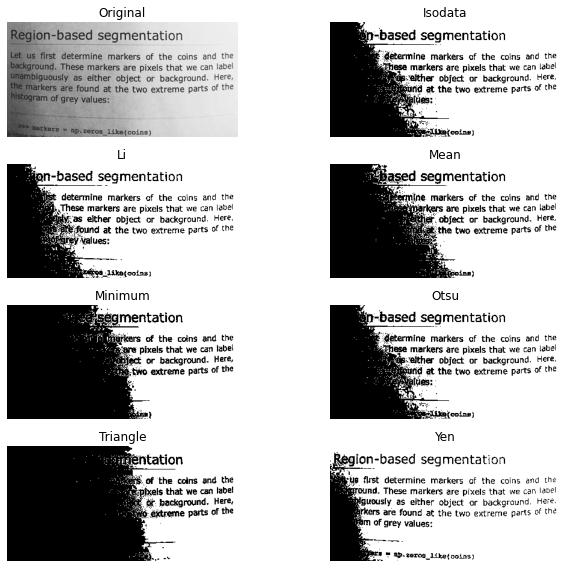

In [15]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
# TODO: Slide image for segmentation, alpha blerding

In [ ]:
import cv2

In [341]:
imageA = data.coins()

In [342]:
imageA.shape

(303, 384)

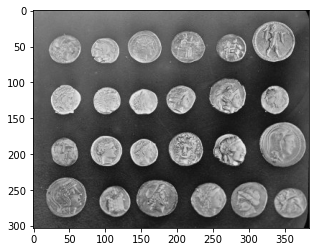

In [343]:
plt.imshow(imageA, cmap=plt.cm.gray)

In [344]:
imageB = data.text();

In [345]:
imageB.shape

(172, 448)

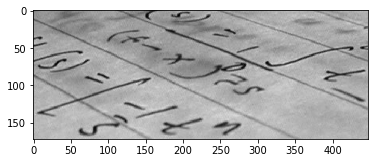

In [346]:
plt.imshow(imageB, cmap=plt.cm.gray)

In [347]:
imageB = cv2.resize(imageB, (imageA.shape[1], imageA.shape[0]))

In [348]:
imageB.shape

(303, 384)

In [438]:
def alphaBlendingSegment(A: np.array, B: np.array, alpha = .5) -> np.array:
  """
  Parameters
    A (np.array) input image A
    B (np.array) input image B
    alpha (float) alpha value

    Important
      A and B must be same size
  """
  A = A.copy().astype(np.uint8)
  B = B.copy().astype(np.uint8)
  output = np.zeros_like(A)
  for i in range(A.shape[0]):
    for j in range(A.shape[1]):
      output[i, j] = (((1 - alpha) * A[i, j]) + (alpha * B[i, j]))

  return output

In [439]:
def plot(items:list):
  """
    Display the given images side by side

    Parameters
      ----------
      items (list): list of tuples (image:np.array, title:str)
  """
  size = len(items)
  _, ax = plt.subplots(1, size, figsize=(20, 20))

  for i in range(size):
    ax[i].imshow(items[i][0], cmap='gray')
    ax[i].set_title(items[i][1])
    ax[i].axis('off')

In [440]:
alphaDot5 = alphaBlendingSegment(imageB, imageA)
alpha1 = alphaBlendingSegment(imageB, imageA, 1)
alpha1Dot5 = alphaBlendingSegment(imageB, imageA, 1.5)
alpha2 = alphaBlendingSegment(imageB, imageA, 2)

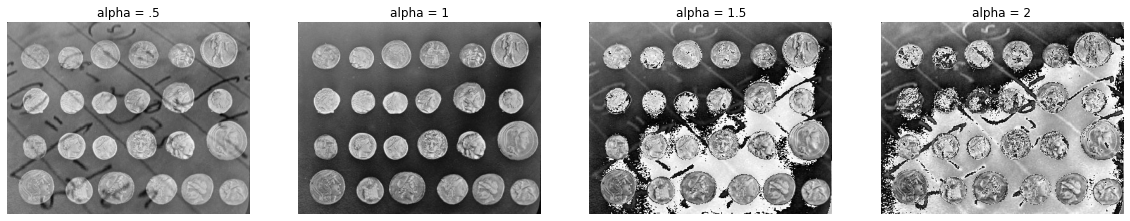

In [441]:
plot([
  (alphaDot5, 'alpha = .5'),
  (alpha1, 'alpha = 1'),
  (alpha1Dot5, 'alpha = 1.5'),
  (alpha2,  'alpha = 2')
])

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

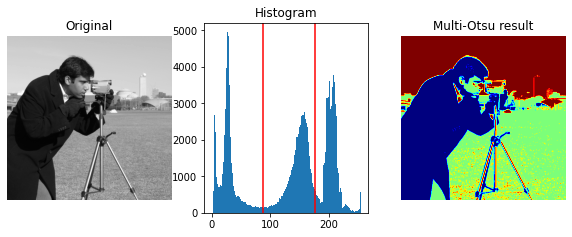

In [ ]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# Imagenes propias


In [ ]:
!pip install -q image_slicer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import requests
from image_slicer import slice, join
from image_slicer.main import Tile
from PIL import Image, ImageOps
from io import BytesIO
from PIL import Image


In [ ]:
#Funcion para leer una imagen desde un url

def load_image_url(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  return img
def show_threshold(image):
  
  thresh = threshold_otsu(image, )
  binary = image > thresh

  fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
  ax = axes.ravel()
  ax[0] = plt.subplot(1, 3, 1)
  ax[1] = plt.subplot(1, 3, 2)
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

  ax[0].imshow(image, cmap=plt.cm.gray)
  ax[0].set_title('Original')
  ax[0].axis('off')

  ax[1].hist(image.ravel(), bins=256)
  ax[1].set_title('Histogram')
  ax[1].axvline(thresh, color='r')

  ax[2].imshow(binary, cmap=plt.cm.gray)
  ax[2].set_title('Thresholded')
  ax[2].axis('off')

  plt.show()

def show_multi(image):
  thresholds = threshold_multiotsu(image)

  # Using the threshold values, we generate the three regions.
  regions = np.digitize(image, bins=thresholds)

  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

  # Plotting the original image.
  ax[0].imshow(image, cmap='gray')
  ax[0].set_title('Original')
  ax[0].axis('off')

  # Plotting the histogram and the two thresholds obtained from
  # multi-Otsu.
  ax[1].hist(image.ravel(), bins=255)
  ax[1].set_title('Histogram')
  for thresh in thresholds:
      ax[1].axvline(thresh, color='r')

  # Plotting the Multi Otsu result.
  ax[2].imshow(regions, cmap='jet')
  ax[2].set_title('Multi-Otsu result')
  ax[2].axis('off')

  plt.subplots_adjust()

plt.show()

3. Experimenta con diferentes imagenes ademas de las provistas en en Colab, identifca imagenes con diferentes backgrounds y estilos, cuales son las limitaciones de single thresholding contra el algoritmo de Otsu


In [ ]:
urls = ["https://datacarpentry.org/image-processing/data/shapes-01.jpg", "https://datacarpentry.org/image-processing/data/maize-root-cluster.jpg",
        "https://datacarpentry.org/image-processing/data/shapes-02.jpg", "https://datacarpentry.org/image-processing/fig/colonies-01.jpg"]

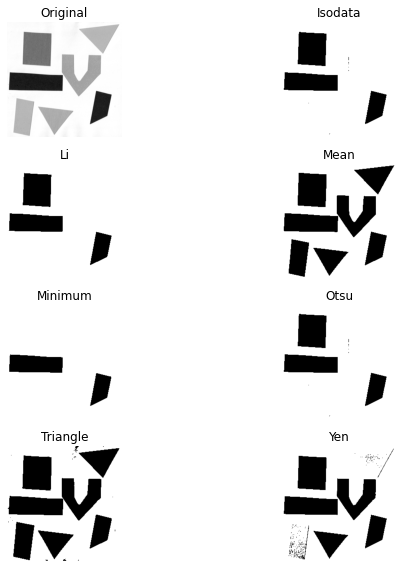

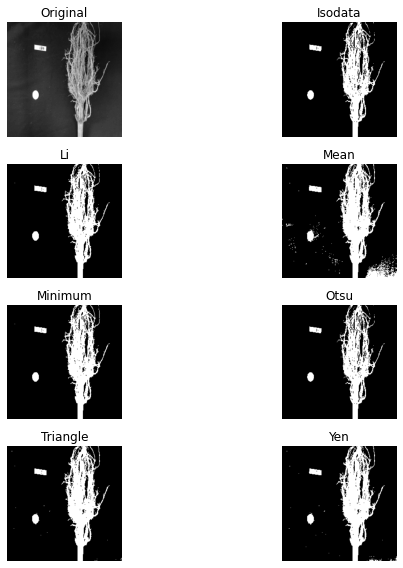

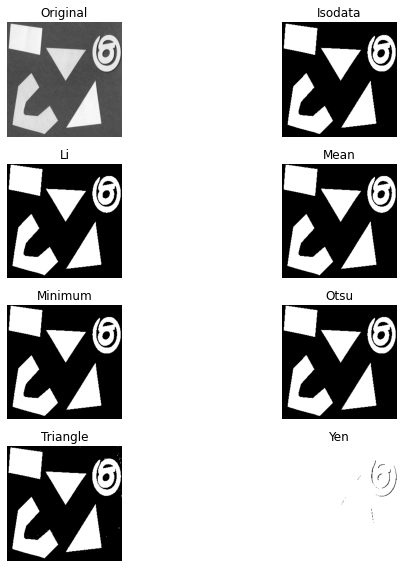

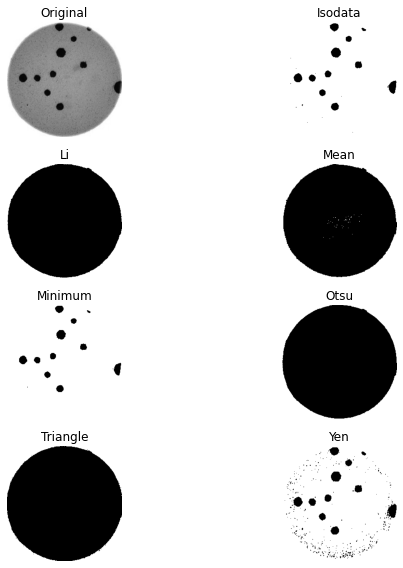

In [ ]:
for url in urls:
  img = load_image_url(url).resize((256, 256)).convert("L")
  img = np.array(img)
  fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
  plt.show()

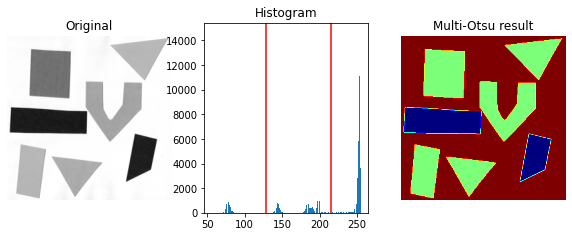

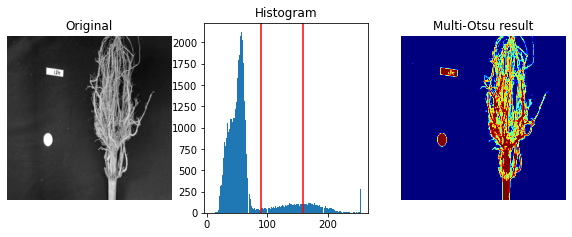

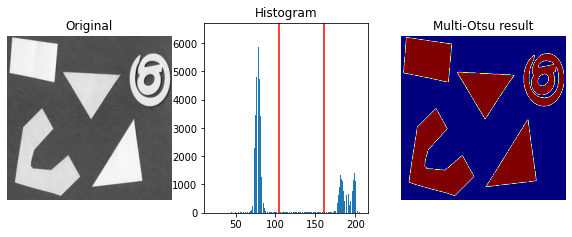

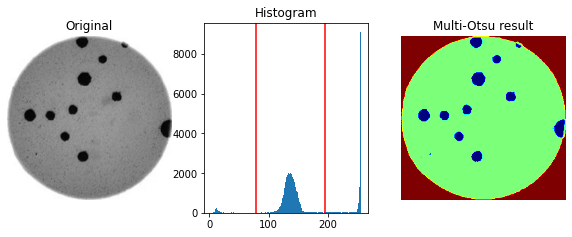

In [ ]:
for url in urls:
  img = load_image_url(url).resize((256, 256)).convert("L")
  img = np.array(img)
  show_multi(img)

4. (Opcional) Como en un proyecto previo, es posible aplicar Otsu para ventanas de diferentes tamaños, obteniendo mejores resultados. Realiza esta implementacion y ve como mejoran los resultados con el ejemplo de la hoja de papel.


In [ ]:
img = Image.fromarray(data.page())

img.save("image.png")

### Window Otsu thresholding 

Tiles used to Otsu:  2




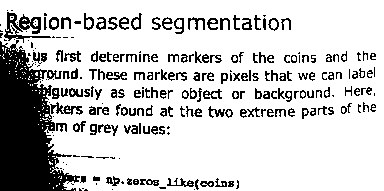

Tiles used to Otsu:  4




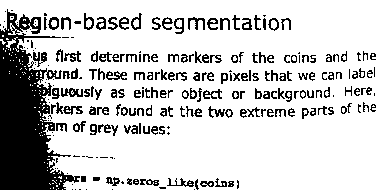

Tiles used to Otsu:  6




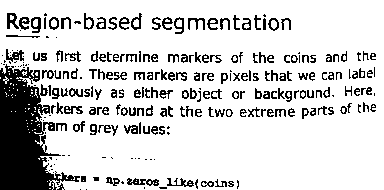

Tiles used to Otsu:  8




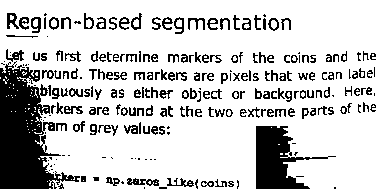

Tiles used to Otsu:  10




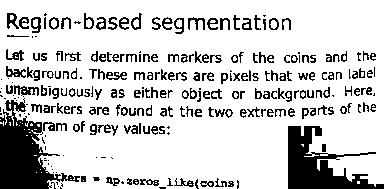

Tiles used to Otsu:  12




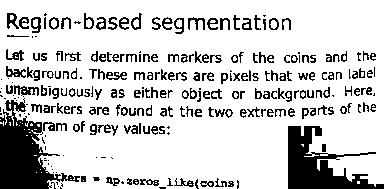

Tiles used to Otsu:  14




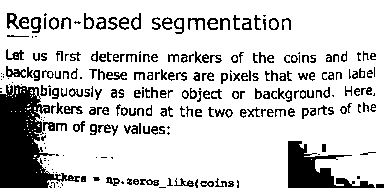

Tiles used to Otsu:  16




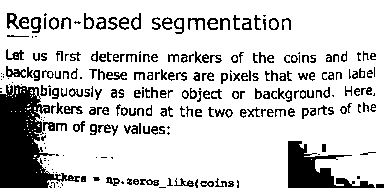

Tiles used to Otsu:  18




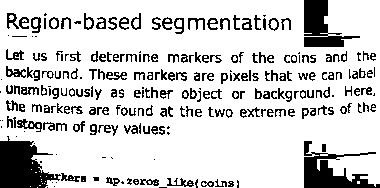

Tiles used to Otsu:  20




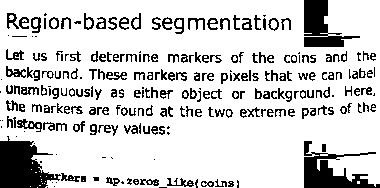

In [ ]:
tiles_range = range(2,22,2)
for n in tiles_range:
  tiles = slice('image.png', n)
  for tile in tiles:
    threshold = threshold_otsu(np.array(tile.image))
    image_process = tile.image.convert('L')
    image_process = image_process.point( lambda p: 255 if p > threshold else 0 )
    image_process = image_process.convert('1')
    tile.image = image_process

  print("Tiles used to Otsu: ", n)
  print("\n")
  display(join(tiles))

### Window Multi Otsu thresholding 

Tiles used to equalization:  2




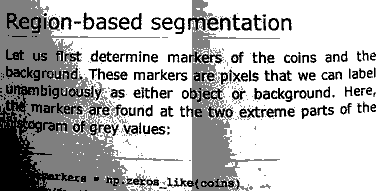

Tiles used to equalization:  4




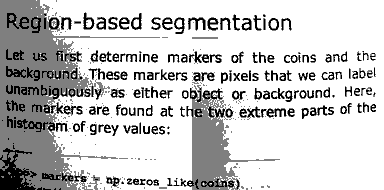

Tiles used to equalization:  6




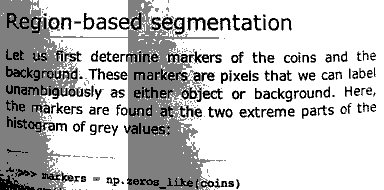

Tiles used to equalization:  8




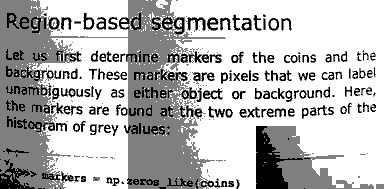

In [ ]:
tiles_range = range(2,10,2)
for n in tiles_range:
  tiles = slice('image.png', n)
  for tile in tiles:
    image_process = np.array(tile.image)
    thresholds = threshold_multiotsu(image_process)
    regions = np.digitize(image_process, bins=thresholds)
    
    tile.image = Image.fromarray((regions*255//(regions.max())).astype("uint8"))

  print("Tiles used to equalization: ", n)
  print("\n")
  display(join(tiles))